<a href="https://colab.research.google.com/github/Tejaswini0303/Rapidious-Assignment/blob/main/Applying_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#imported all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import math
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve)

In [ ]:
#importing csv file
df=pd.read_csv('epi_r.csv')
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(20052, 680)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [ ]:
#describing statistical information about the dataset like mean,meax and min value
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.nunique()

,0
title,17736
rating,8
calories,1858
protein,282
fat,326
...,...
cookbooks,2
leftovers,2
snack,2
snack week,2


In [ ]:
df.isnull().sum()

,0
title,0
rating,0
calories,4117
protein,4162
fat,4183
...,...
cookbooks,0
leftovers,0
snack,0
snack week,0


In [21]:
df = df[df['calories'] < 10000].dropna()

In [23]:
df = df[:][:500]


In [24]:
y = df.dessert.values
x = df.drop(["dessert"], axis = 1)

In [25]:
df['dessert'].isnull().sum()

0

# SPLITTING THE DATASET

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

# 1.*Logistic Regression*

In [26]:
model=LogisticRegression()

In [47]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
model

LogisticRegression()

In [49]:
model.intercept_
model.coef_

array([[-1.25888730e-01,  8.57562659e-03, -1.76076313e-01,
        -6.51507743e-02, -3.73438873e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.30033176e-01,  0.00000000e+00,
         0.00000000e+00, -4.08423091e-01, -2.37974804e-01,
         0.00000000e+00,  0.00000000e+00, -4.01047725e-02,
         4.51139767e-02,  0.00000000e+00,  0.00000000e+00,
        -1.68655979e-01,  3.19273588e-02,  0.00000000e+00,
         7.05363029e-02,  0.00000000e+00, -2.92323407e-02,
        -1.90911657e-02,  0.00000000e+00, -1.19820713e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.26566209e-02, -8.38761159e-03, -1.87377222e-01,
        -3.63683173e-02,  1.67436545e+00,  4.00010092e-02,
         0.00000000e+00, -4.83821292e-02,  0.00000000e+00,
        -7.92493787e-04, -2.59042126e-02, -1.37509633e-03,
         5.48193111e-04,  0.00000000e+00, -7.07699340e-04,
         6.77367366e-02,  0.00000000e+00, -2.04437446e-0

In [51]:
y_pred=model.predict(x_test)

In [52]:
print(confusion_matrix(y_test, y_pred))

[[122   7]
 [  9  20]]


In [53]:
accuracy_score(y_test, y_pred)

0.8987341772151899

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       129
         1.0       0.74      0.69      0.71        29

    accuracy                           0.90       158
   macro avg       0.84      0.82      0.83       158
weighted avg       0.90      0.90      0.90       158



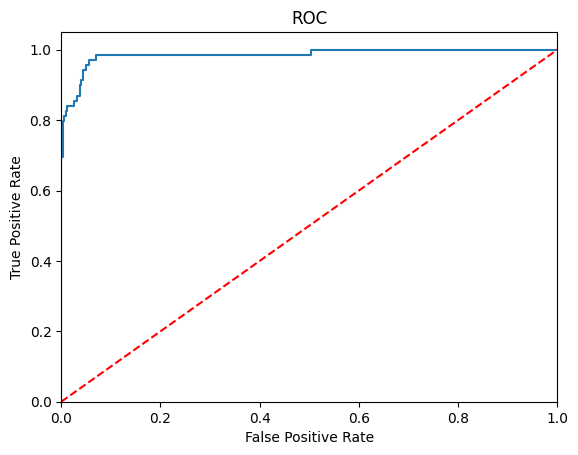

In [55]:
logit_roc_auc = roc_auc_score(y, model.predict(x))

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

#2. Gaussian Naive Bayes

In [59]:
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB()

In [61]:
y_prednb=model_nb.predict(x_test)

In [62]:
y_prednb

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [63]:
print(confusion_matrix(y_test,y_prednb))

[[125   4]
 [ 14  15]]


In [65]:
accuracy_score(y_test,y_prednb)

0.8860759493670886

In [67]:
print(classification_report(y_test,y_prednb))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       129
         1.0       0.79      0.52      0.62        29

    accuracy                           0.89       158
   macro avg       0.84      0.74      0.78       158
weighted avg       0.88      0.89      0.88       158



#3. K Nearest Neighbors

In [70]:
knn_model=KNeighborsClassifier(n_neighbors=5)


In [71]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
y_predknn=knn_model.predict(x_test)

In [74]:
print(confusion_matrix(y_test,y_predknn))

[[120   9]
 [ 25   4]]


In [75]:
accuracy_score(y_test,y_predknn)

0.7848101265822784

In [76]:
print(classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       129
         1.0       0.31      0.14      0.19        29

    accuracy                           0.78       158
   macro avg       0.57      0.53      0.53       158
weighted avg       0.73      0.78      0.75       158



# 4.SVM

In [78]:
svm_model=SVC(kernel="linear")
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [79]:
y_linear=svm_model.predict(x_test)

In [80]:
print(confusion_matrix(y_test,y_linear))

[[123   6]
 [  8  21]]


In [82]:
print(classification_report(y_test,y_linear))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       129
         1.0       0.78      0.72      0.75        29

    accuracy                           0.91       158
   macro avg       0.86      0.84      0.85       158
weighted avg       0.91      0.91      0.91       158



In [85]:
rbf_model=SVC(kernel="rbf")
rbf_model.fit(x_train, y_train)

SVC()

In [87]:
y_rbf=rbf_model.predict(x_test)

In [91]:
poly_model=SVC(kernel='poly')
poly_model.fit(x_train,y_train)

SVC(kernel='poly')

In [92]:
y_poly=poly_model.predict(x_test)

In [96]:
sig_model=SVC(kernel="sigmoid")
sig_model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [97]:
y_sigmoid=sig_model.predict(x_test)

In [101]:
print('Linear Accuracy: ',accuracy_score(y_test,y_linear))

Linear Accuracy:  0.9113924050632911


In [99]:
print('Radial Basis Function Accuracy: ',accuracy_score(y_test,y_rbf))

Radial Basis Function Accuracy:  0.8164556962025317


In [100]:
print('Polynomial Accuracy: ',accuracy_score(y_test,y_poly))

Polynomial Accuracy:  0.8164556962025317


In [102]:
print('Sigmoid Accuracy: ',accuracy_score(y_test,y_sigmoid))

Sigmoid Accuracy:  0.8164556962025317


# 5.Decision Tree

In [103]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [104]:
y_tree=model.predict(x_test)

[Text(0.6190476190476191, 0.9444444444444444, 'x[37] <= 0.5\ngini = 0.282\nsamples = 235\nvalue = [195, 40]'),
 Text(0.42857142857142855, 0.8333333333333334, 'x[226] <= 0.5\ngini = 0.121\nsamples = 186\nvalue = [174, 12]'),
 Text(0.3333333333333333, 0.7222222222222222, 'x[93] <= 0.5\ngini = 0.084\nsamples = 181\nvalue = [173, 8]'),
 Text(0.2857142857142857, 0.6111111111111112, 'x[517] <= 0.5\ngini = 0.065\nsamples = 179\nvalue = [173, 6]'),
 Text(0.23809523809523808, 0.5, 'x[231] <= 0.5\ngini = 0.044\nsamples = 177\nvalue = [173, 4]'),
 Text(0.14285714285714285, 0.3888888888888889, 'x[489] <= 0.5\ngini = 0.023\nsamples = 174\nvalue = [172, 2]'),
 Text(0.09523809523809523, 0.2777777777777778, 'x[381] <= 0.5\ngini = 0.011\nsamples = 173\nvalue = [172, 1]'),
 Text(0.047619047619047616, 0.16666666666666666, 'gini = 0.0\nsamples = 164\nvalue = [164, 0]'),
 Text(0.14285714285714285, 0.16666666666666666, 'x[0] <= 4.688\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.09523809523809523, 0

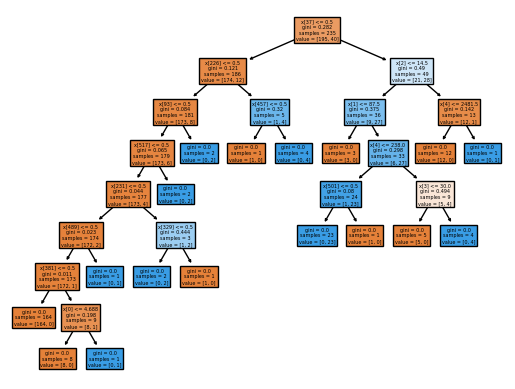

In [116]:
from sklearn.tree import plot_tree
plot_tree(tree_model,filled=True)

In [107]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_tree))

Decision Tree Accuracy:  0.8987341772151899


In [108]:
print(confusion_matrix(y_test,y_tree))

[[122   7]
 [  9  20]]


In [110]:
print(classification_report(y_test,y_tree))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       129
         1.0       0.74      0.69      0.71        29

    accuracy                           0.90       158
   macro avg       0.84      0.82      0.83       158
weighted avg       0.90      0.90      0.90       158



# 6.Random Forest Classifier

In [111]:
random_model=RandomForestClassifier(n_estimators=100)
random_model.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
y_random=random_model.predict(x_test)

In [113]:
print('Random Forest Classifier Accuracy: ',accuracy_score(y_test,y_random))

Random Forest Classifier Accuracy:  0.930379746835443


In [114]:
print(confusion_matrix(y_test,y_random))

[[129   0]
 [ 11  18]]


In [115]:
print(classification_report(y_test,y_random))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       129
         1.0       1.00      0.62      0.77        29

    accuracy                           0.93       158
   macro avg       0.96      0.81      0.86       158
weighted avg       0.94      0.93      0.92       158



In [121]:
boost_model=AdaBoostClassifier(n_estimators=5)
boost_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=5)

In [122]:
y_boost=boost_model.predict(x_test)

In [123]:
print('Ada Boost Classifier Accuracy: ',accuracy_score(y_test,y_boost))

Ada Boost Classifier Accuracy:  0.8481012658227848


In [124]:
print(confusion_matrix(y_test,y_boost))

[[119  10]
 [ 14  15]]


In [125]:
print(classification_report(y_test,y_boost))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       129
         1.0       0.60      0.52      0.56        29

    accuracy                           0.85       158
   macro avg       0.75      0.72      0.73       158
weighted avg       0.84      0.85      0.84       158



In [141]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters = 3)
k_fit = clusters.fit(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


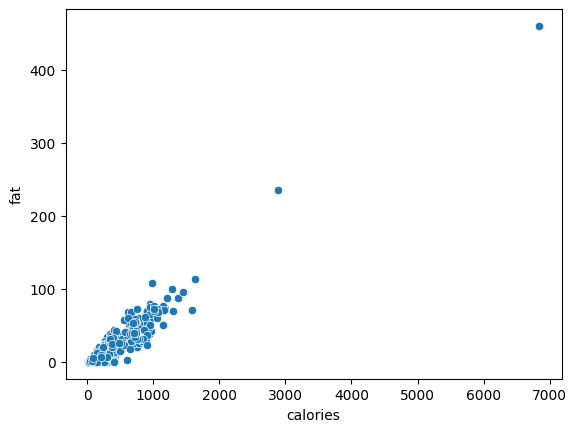

In [149]:
import matplotlib.pyplot as plt
sb.scatterplot(x="calories", y="fat",  data=df)
plt.show()

In [144]:
y_cluster=clusters.fit_predict(df)
y_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,

In [145]:
df['clusters']=y_cluster

In [146]:
r1=df[df.clusters==0]
r2=df[df.clusters==1]

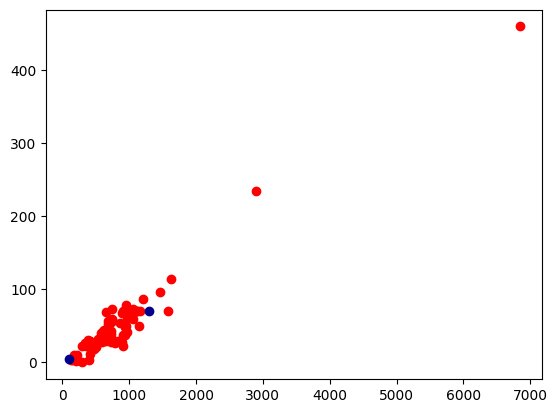

In [211]:
plt.scatter(r1['calories'],r1['fat'],color='red')
plt.scatter(r2['calories'],r2['fat'],color='darkblue')



1. print('Logistic Regression Accuracy: ',accuracy_score(y_test,y_pred)) #0.8987341772151899
2. print('Gaussian NB Accuracy: ',accuracy_score(y_test,y_prednb)) #0.8860759493670886
3. print('KNN Accuracy: ',accuracy_score(y_test,y_predknn)) #0.7848101265822784
4. print('Linear Accuracy: ',accuracy_score(y_test,y_linear)) #0.9113924050632911
5. print('Radial Basis Function Accuracy: ',accuracy_score(y_test,y_rbf)) # 0.8164556962025317
6. print('Polynomial Accuracy: ',accuracy_score(y_test,y_poly)) #0.8164556962025317
7. print('Sigmoid Accuracy: ',accuracy_score(y_test,y_sigmoid)) #0.8164556962025317
8. print('Decision Tree Accuracy: ',accuracy_score(y_test,y_tree)) #0.8987341772151899
9. print('Random Forest Classifier Accuracy: ',accuracy_score(y_test,y_random)) #0.930379746835443
10. print('Ada Boost Classifier Accuracy: ',accuracy_score(y_test,y_boost)) #0.8481012658227848

